In [101]:
# magic, dependencies, load data
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

city = "resources/city_data.csv"
ride = "resources/ride_data.csv"
city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)

In [102]:
# do some data checks, mostly for nulls
city_df.count()
city_df.isnull().sum()
city_df.dtypes
ride_df.count()
ride_df.isnull().sum()
city_df.dtypes
city_df["type"].unique()
sum(city_df["type"]=="Rural")

18

In [103]:
# merge and create DFs per city type
pyber_df = pd.merge(ride_df, city_df, how = "left", on =["city", "city"])

urban_df = pyber_df[pyber_df["type"] == "Urban"]
suburban_df = pyber_df[pyber_df["type"] == "Suburban"]
rural_df = pyber_df[pyber_df["type"] == "Rural"]

In [104]:
# number of rides per city
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]

In [105]:
# farest list and ave fare per city
urban_fares = urban_df["fare"]
suburban_fares = suburban_df["fare"]
rural_fares = rural_df["fare"]
urban_ave_fare = urban_df.groupby(["city"]).mean()["fare"]
suburban_ave_fare = suburban_df.groupby(["city"]).mean()["fare"]
rural_ave_fare = rural_df.groupby(["city"]).mean()["fare"]

In [106]:
# ave number of drivers per city
urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]

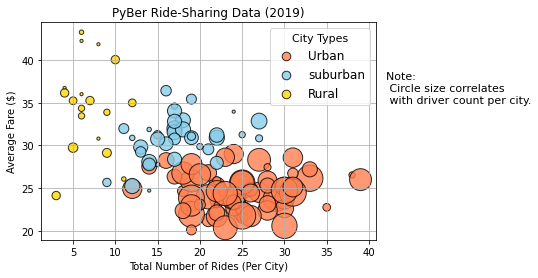

In [107]:
# scatter urban

#plt.subplots(figsize=(8, 8))
plt.scatter(urban_ride_count, 
            urban_ave_fare,
            s = 10 * urban_driver_count, c = "coral",
            edgecolor="black", linewidths = 1,
            alpha=0.8, label="Urban")
plt.scatter(suburban_ride_count, 
            suburban_ave_fare,
            s = 10 * suburban_driver_count, c = "skyblue",
            edgecolor="black", linewidths = 1,
            alpha=0.8, label="suburban")
plt.scatter(rural_ride_count, 
            rural_ave_fare,
            s = 10 * rural_driver_count, c = "gold",
            edgecolor="black", linewidths = 1,
            alpha=0.8, label="Rural")

# beautify plus legend
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [74]
lgnd.legendHandles[1]._sizes = [74]
lgnd.legendHandles[2]._sizes = [74]
lgnd.get_title().set_fontsize(11)

plt.text(42, 35, "Note: \n Circle size correlates \n with driver count per city.", fontsize="11")
plt.savefig("analysis/Fig1.png")

In [108]:
# probe data
# numpy  or scystat (sts) - mean, median, mode on ride counts, fares, and ride, driver counts
mean_urban_ride_count = np.mean(urban_ride_count)
mean_suburban_ride_count = np.mean(suburban_ride_count)
mean_rural_ride_count = np.mean(rural_ride_count)

median_urban_ride_count = np.median(urban_ride_count)
median_suburban_ride_count = np.median(suburban_ride_count)
median_rural_ride_count = np.median(rural_ride_count)

mode_urban_ride_count = sts.mode(urban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mode_rural_ride_count = sts.mode(rural_ride_count)

# numpy  or scystat (sts) - mean, median, mode on ave fares
mean_urban_fare = np.mean(urban_fares)
mean_suburban_fare = np.mean(suburban_fares)
mean_rural_fare = np.mean(rural_fares)

median_urban_fare = np.median(urban_fares)
median_suburban_fare = np.median(suburban_fares)
median_rural_fare = np.median(rural_fares)

mode_urban_fare = sts.mode(urban_fares)
mode_suburban_fare = sts.mode(suburban_fares)
mode_rural_fare = sts.mode(rural_fares)

# driver count per city type
urban_drivers = urban_df['driver_count']
suburban_drivers = suburban_df['driver_count']
rural_drivers = rural_df['driver_count']

# ave driver per city
mean_urban_drivers = round(np.mean(urban_drivers))
mean_suburban_drivers = round(np.mean(suburban_drivers))
mean_rural_drivers = round(np.mean(rural_drivers))

#print(f"The average number of drivers in urban cities is {mean_urban_drivers}.")


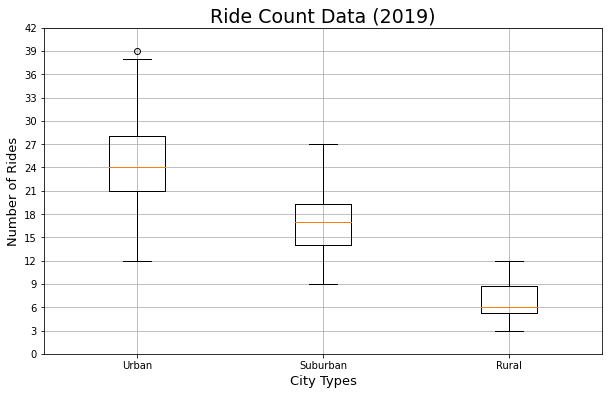

In [109]:
# box n whisker ride count
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=19)
ax.set_ylabel('Number of Rides',fontsize=13)
ax.set_xlabel("City Types",fontsize=13)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [110]:
# outlier data find and print
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


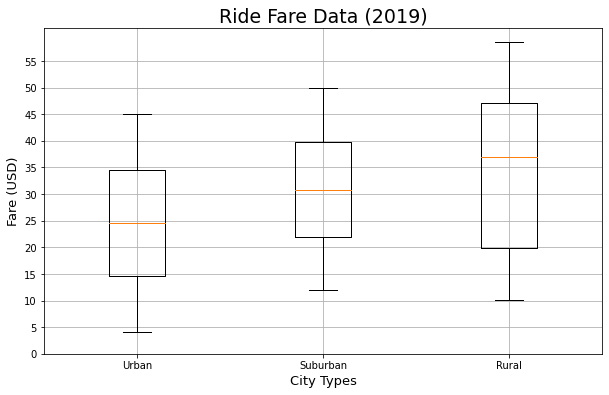

In [111]:
# box n whisker ride fare per city type
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=19)
ax.set_ylabel('Fare (USD)',fontsize=13)
ax.set_xlabel("City Types",fontsize=13)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

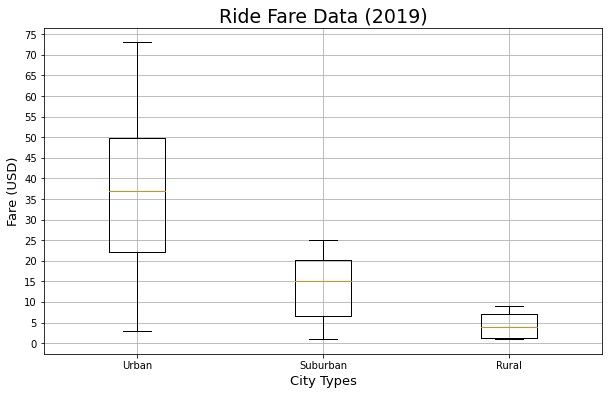

In [112]:
# box n whisker driver count per city type
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=19)
ax.set_ylabel('Fare (USD)',fontsize=13)
ax.set_xlabel("City Types",fontsize=13)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

In [115]:
# sum of all fares per city city
sum_fares_by_type = pyber_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

total_fares = pyber_df["fare"].sum()
total_fares

# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_df.groupby(["type"]).sum()["fare"] / pyber_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

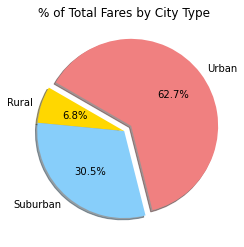

In [121]:
plt.pie(type_percents, 
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, 
    startangle=150)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("analysis/Fig5.png")
plt.show()